In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [4]:
# Load data (Replace 'your_file.csv' with actual filename)
df = pd.read_csv('D:/Projects/Reward Data Analyst/nvidia_clean.csv')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

# Sort data by date (important for time-series)
df = df.sort_values('Date')

# Drop the Date column for training purposes
df.drop(columns=['Date'], inplace=True)

# Inspect the data
print(df.head())

       Open      High       Low     Close  Adj_Close      Volume
0  0.043750  0.048828  0.038802  0.041016   0.017325  2714688000
1  0.044271  0.045833  0.041016  0.045313   0.019140   510480000
2  0.045833  0.046745  0.041146  0.041797   0.017655   343200000
3  0.041927  0.042969  0.039583  0.041667   0.017600   244368000
4  0.041667  0.041927  0.041276  0.041536   0.017544   227520000


In [5]:
# Define features and target variable
X = df[['Open', 'High', 'Low', 'Volume']]  # Features (you can add more features)
y = df['Close']  # Target variable

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

# Standardize feature values (important for linear regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Linear Regression Results:
Mean Squared Error: 0.2668
R-squared Score: 0.9998


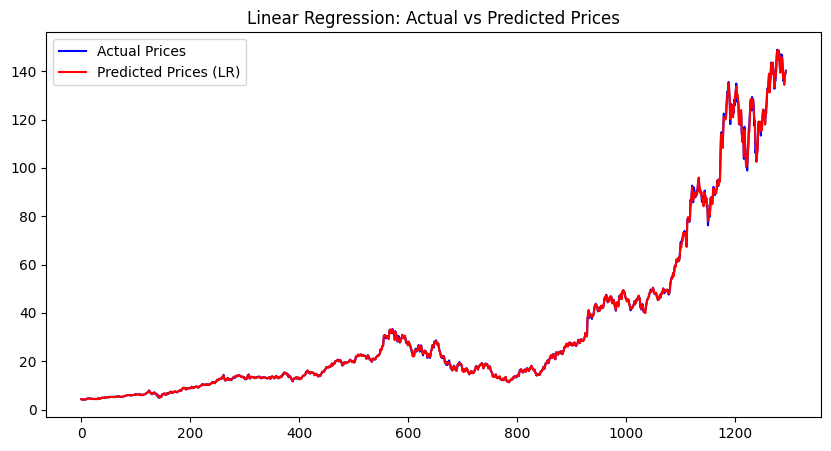

In [6]:
# Train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Predict using test data
y_pred_lr = lr_model.predict(X_test_scaled)

# Evaluate the model
print("Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_lr):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred_lr):.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred_lr, label='Predicted Prices (LR)', color='red')
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.legend()
plt.show()

In [15]:
model1 = LinearRegression()
model2 = GradientBoostingRegressor(n_estimators=100)

ensemble_model = VotingRegressor([('lr', model1), ('gbr', model2)])
ensemble_model.fit(X_train, y_train)
y_pred = ensemble_model.predict(X_test)

Linear Regression Results:
Mean Squared Error: 490.6696
R-squared Score: 0.6073


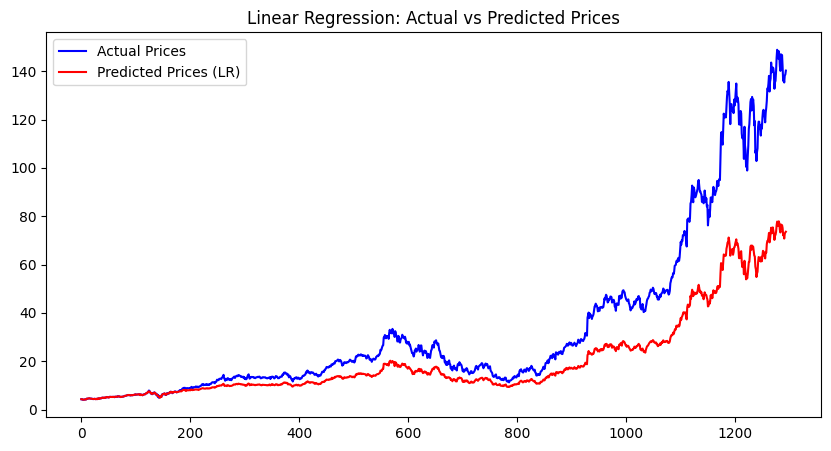

In [16]:
# Evaluate the model
print("Linear Regression Results:")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.4f}")
print(f"R-squared Score: {r2_score(y_test, y_pred):.4f}")

# Plot actual vs predicted
plt.figure(figsize=(10, 5))
plt.plot(y_test.values, label='Actual Prices', color='blue')
plt.plot(y_pred, label='Predicted Prices (LR)', color='red')
plt.title("Linear Regression: Actual vs Predicted Prices")
plt.legend()
plt.show()